In [2]:
import pandas as pd
import numpy as np

In [4]:
df_rh = pd.read_csv('Relative humidity.csv', skiprows=12)
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               8640 non-null   object 
 1   Relative humidity at 1.5m (%)(01)  8640 non-null   float64
 2   Relative humidity at 1.5m (%)(02)  8640 non-null   float64
 3   Relative humidity at 1.5m (%)(03)  8640 non-null   float64
 4   Relative humidity at 1.5m (%)(04)  8640 non-null   float64
 5   Relative humidity at 1.5m (%)(05)  8640 non-null   float64
 6   Relative humidity at 1.5m (%)(06)  8640 non-null   float64
 7   Relative humidity at 1.5m (%)(07)  8640 non-null   float64
 8   Relative humidity at 1.5m (%)(08)  8640 non-null   float64
 9   Relative humidity at 1.5m (%)(09)  8640 non-null   float64
 10  Relative humidity at 1.5m (%)(10)  8640 non-null   float64
 11  Relative humidity at 1.5m (%)(11)  8640 non-null   float

In [13]:
df_rh.rename(columns = {df_rh.columns[0]: 'Date'}, inplace = True)
df_rh['Date'] = pd.to_datetime(df_rh['Date'], errors='coerce')
df_rh['RH_mean'] = df_rh.iloc[:, 1:].mean(axis = 1)

In [15]:
df_rh['Year'] = df_rh['Date'].dt.year
df_rh['Month'] = df_rh['Date'].dt.month

In [17]:
annual_rh = df_rh.groupby('Year').agg(
    RH_annual_mean=('RH_mean', 'mean'),
    RH_summer_mean=('RH_mean', lambda x: x[df_rh.loc[x.index, 'Month'].isin([6, 7, 8])].mean()),
    High_Humidity_Days=('RH_mean', lambda x: (x > 70).sum())
).loc[2013:2035]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

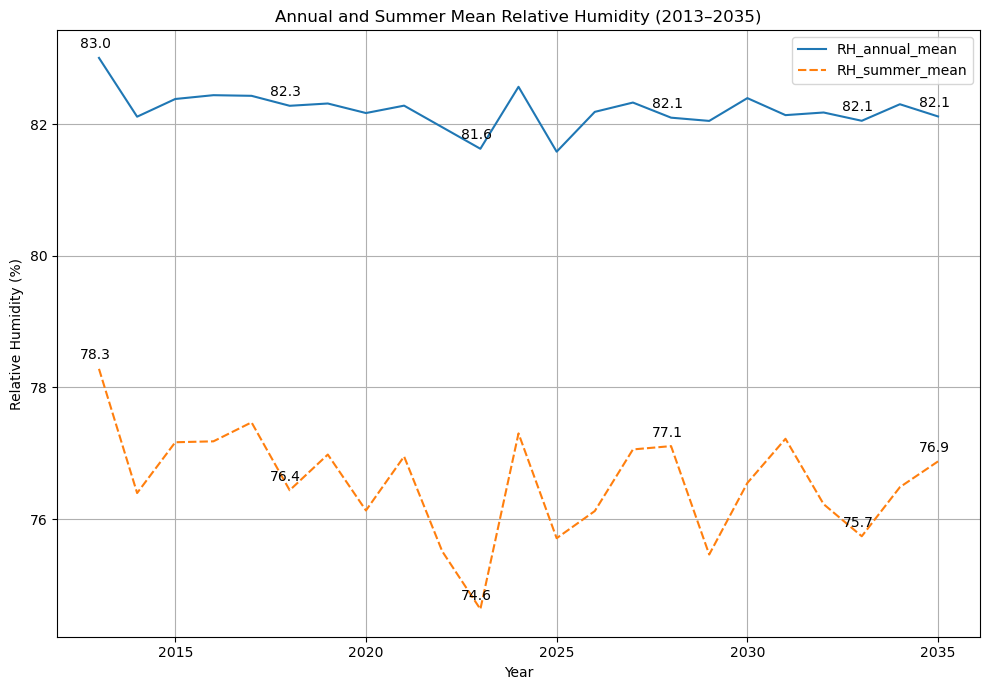

In [46]:
plt.figure(figsize=(10, 7))
number = sns.lineplot(data=annual_rh[['RH_annual_mean', 'RH_summer_mean']])

years = {annual_rh.index.min(), annual_rh.index.max()}
years.update(y for y in annual_rh.index if (y - annual_rh.index.min()) % 5 == 0) #每5年

for col in ['RH_annual_mean', 'RH_summer_mean']:
    for x, y in zip(annual_rh.index, annual_rh[col]):
        if x in years:
            number.text(x-0.1, y+0.1, f'{y:.1f}', ha='center', va='bottom', fontsize=10)
        
plt.ylabel('Relative Humidity (%)')
plt.title('Annual and Summer Mean Relative Humidity (2013–2035)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
annual_rh

,RH_annual_mean,RH_summer_mean,High_Humidity_Days
Year,,,
2013.0,83.008284,78.281940,358
2014.0,82.114649,76.394582,358
2015.0,82.383694,77.166682,358
2016.0,82.441611,77.180551,359
2017.0,82.431913,77.468748,358
2018.0,82.280343,76.436851,358
2019.0,82.315140,76.979714,358
2020.0,82.170205,76.129695,359
2021.0,82.282537,76.950555,358
